# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Probability theory
### VIDEO: Sampling variability
#### TEACHER: Mike X Cohen, sincxpress.com

In [7]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

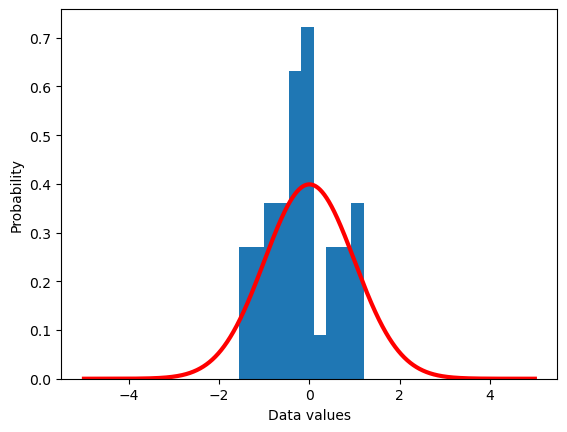

In [15]:
## a theoretical normal distribution
x = np.linspace(-5,5,10101)
theoNormDist = stats.norm.pdf(x)
# (normalize to pdf)
# theoNormDist = theoNormDist*np.mean(np.diff(x))


# now for our experiment
numSamples = 40

# initialize
sampledata = np.zeros(numSamples)

# run the experiment!
for expi in range(numSamples):
    sampledata[expi] = np.random.randn()


# show the results
plt.hist(sampledata,density=True)
plt.plot(x,theoNormDist,'r',linewidth=3)
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.show()

In [23]:
## show the mean of samples of a known distribution

# generate population data with known mean
populationN = 1000000
population  = np.random.randn(populationN)
population  = population - np.mean(population) # demean
#subtracting the mean so the population has an average of 0
#we want to know the exact average population


# now we draw a random sample from that population
samplesize = 30

# the random indices to select from the population
sampleidx = np.random.randint(0,populationN,samplesize)
samplemean = np.mean(population[ sampleidx ])

### how does the sample mean compare to the population mean?
print(samplemean)

-0.1376722852554369


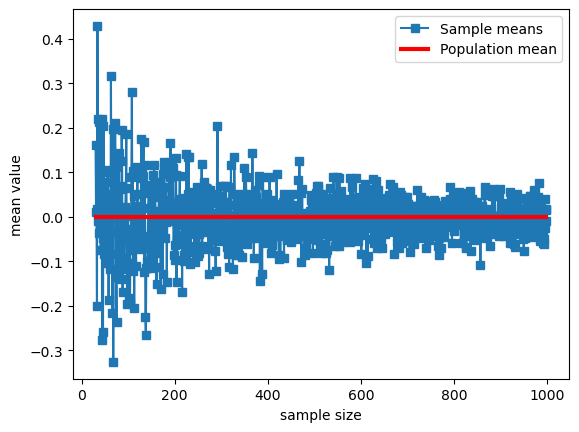

In [24]:
## repeat for different sample sizes

samplesizes = np.arange(30,1000)

samplemeans = np.zeros(len(samplesizes))

for sampi in range(len(samplesizes)):
    
    # nearly the same code as above
    sampleidx = np.random.randint(0,populationN,samplesizes[sampi])
    samplemeans[sampi] = np.mean(population[ sampleidx ])


# show the results!
plt.plot(samplesizes,samplemeans,'s-')
plt.plot(samplesizes[[0,-1]],[np.mean(population),np.mean(population)],'r',linewidth=3)
plt.xlabel('sample size')
plt.ylabel('mean value')
plt.legend(('Sample means','Population mean'))
plt.show()

In [25]:
#The different samples don't seem to converge to the population mean no mattter how much closer we get to 
#the number of samples.
#but if we choose to get the mean of the means we get a better results here.
np.mean(samplemeans[:123])

-0.007449829606236664